**Importing dependecies**

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

**----- DATA ANALYSIS-----**

**Loading the dataset and initial data analysis**

In [ ]:
dataset= load_digits() #Loading data from the sklearn dataset

In [ ]:
dataset.data #pixel values of the data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [ ]:
dataset.target #target values

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [ ]:
dataset.data.shape #dimensions of the dataset

(1797, 64)

In [ ]:
dataset.images.shape #dimensions of each imange

(1797, 8, 8)

In [ ]:
n =2

dataset.images[n] #checking the image at the index of "n"

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

<Figure size 640x480 with 0 Axes>

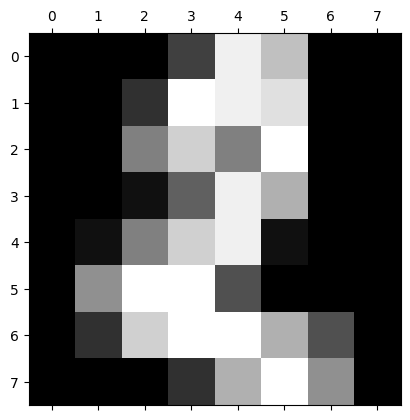

In [ ]:
plt.gray() #a gray scale image
plt.matshow(dataset.images[n]) #gives the above values in the form of an image
plt.show()

In [ ]:
pd.Series(dataset.target).value_counts().sort_index() #Target feature value frequencies

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

**Taking the independent features and the target features into variables for training**

In [ ]:
X = dataset.data #all the images data into X
Y = dataset.target #target feature into Y 

**Analysis of the above separation**

In [101]:
print(X)
print(Y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [ ]:
print(X.shape) #dimensions of X
print(Y.shape) #dimensions of Y

(1797, 64)
(1797,)


**----- BUILDING A MODEL -----**

**Splitting the data for training and testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=21) #Splitting the data(80% for train, 20% for test)

**Analysing the splitted data**

In [ ]:
print(X_train.shape)  #dimensions of the data
print(X_test.shape)

(1437, 64)
(360, 64)


In [ ]:
print(Y_train.shape)  #dimensions of the data
print(Y_test.shape)

(1437,)
(360,)


In [ ]:
print(X) #X data (independent features)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
print(Y)  #target data (dependent feature)

[0 1 2 ... 8 9 8]


**Initializing the model and training it**

In [ ]:
model = SVC(kernel="rbf") #SVC with rbf kernal
model.fit(X_train, Y_train) #Training the model

SVC()

**----- MODEL EVALUATION ----**

**Prediction for test data**

In [109]:
Y_pred = model.predict(X_test)
print(Y_pred)

[6 6 2 5 4 1 2 4 5 3 3 9 4 2 9 1 8 6 8 6 0 5 4 8 3 0 0 3 1 2 0 1 1 6 8 0 2
 4 4 2 1 6 8 5 7 8 9 1 2 9 3 1 0 8 4 8 3 8 7 9 9 5 9 2 7 6 2 1 0 0 1 6 5 7
 2 8 2 9 1 1 6 2 1 1 7 3 4 2 3 2 4 7 3 1 0 5 9 3 7 4 7 3 4 6 9 1 4 0 3 4 0
 7 8 1 5 5 0 0 9 5 4 8 9 6 0 8 7 7 3 6 4 5 7 3 9 7 6 1 0 7 6 5 9 5 7 7 1 7
 4 7 2 6 2 8 8 2 8 8 9 5 7 9 5 5 1 0 4 5 2 2 0 3 3 7 8 0 7 7 3 1 1 7 0 6 6
 2 9 5 3 6 3 3 4 8 1 5 0 1 9 0 3 2 1 5 2 5 1 1 7 8 5 6 0 2 9 7 5 7 8 7 3 6
 1 4 5 4 6 2 5 9 5 4 0 3 4 9 9 9 9 3 3 0 0 9 8 7 5 2 0 0 5 8 4 0 9 2 4 3 9
 2 0 8 1 4 4 7 0 9 3 3 6 2 5 4 5 4 1 8 7 9 1 3 1 5 6 8 6 8 8 2 6 5 7 6 2 8
 8 4 9 1 6 0 2 8 3 0 5 0 4 9 2 7 0 3 4 6 9 3 0 9 4 8 8 7 3 0 1 9 4 4 3 6 5
 6 6 2 4 6 7 1 7 1 5 6 9 6 6 9 8 2 1 3 2 3 9 8 5 6 7 6]


**Confirming manually, the predicted number with the actual number along with image**

Predicted No.:  5
Actual No.:  5


<Figure size 640x480 with 0 Axes>

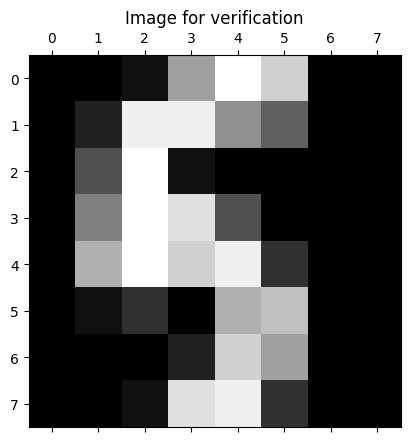

In [ ]:
n = 21 #index number
print("Predicted No.: ", Y_pred[n]) #model predicted number
print("Actual No.: ", Y_test[n]) #n in actual data (splitted data)



plt.gray() #gray image
plt.matshow(X_test[n].reshape(8,8)) #model pedicted number in image
plt.title("Image for verification") 
plt.show()

**Finding Accuracy on training and test data**

In [111]:
X_training_prediction = model.predict(X_train)
X_training_accuracy = accuracy_score(X_training_prediction, Y_train)
print("Accuracy on training data: ", X_training_accuracy)

Accuracy on training data:  0.9937369519832986


In [112]:
X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Test Accuracy: ", X_test_accuracy)

Test Accuracy:  0.9861111111111112


**Classification Report**

In [113]:
CR = classification_report(Y_test, Y_pred)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      0.97      0.99        36
           5       1.00      0.97      0.99        37
           6       0.97      1.00      0.99        36
           7       0.97      0.97      0.97        36
           8       0.97      0.97      0.97        35
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



**Confusion Matrix**

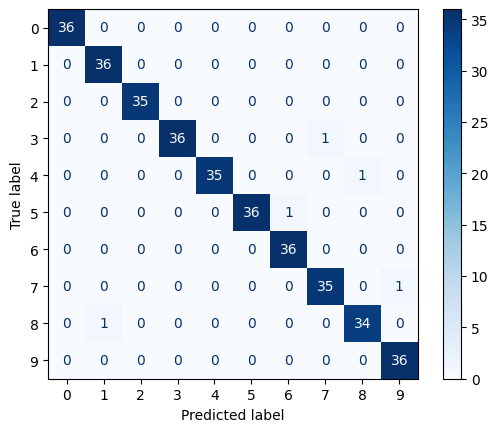

In [119]:
CM = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot(cmap="Blues")
plt.show()

**---- PLAYING WITH KERNALS & HYPERPARAMETERS ----  (optional)** 

In [ ]:
#4 models with diff kernals or hyperparameters

model1 = SVC(kernel="linear")
model2 = SVC(kernel="linear", C=0.1)
model3 = SVC(kernel="rbf") #Our model
model4 = SVC(kernel="rbf", gamma=0.01)
model5 = SVC(kernel="rbf", gamma=0.01, C=0.01)

#Training all models

model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)
model4.fit(X_train, Y_train)
model5.fit(X_train, Y_train)

#Prediction from all models

Model1_pred = model1.predict(X_test)
Model2_pred = model2.predict(X_test)
Model3_pred = model3.predict(X_test)
Model4_pred = model4.predict(X_test)
Model5_pred = model4.predict(X_test)

#Finding accuracy of all models

print("Accuarcy score of M1: ", accuracy_score(Y_test, Model1_pred))
print("Accuarcy score of M2: ", accuracy_score(Y_test, Model2_pred))
print("Accuarcy score of M3: ", accuracy_score(Y_test, Model3_pred))
print("Accuarcy score of M4: ", accuracy_score(Y_test, Model4_pred))
print("Accuarcy score of M5: ", accuracy_score(Y_test, Model5_pred))

Accuarcy score of M1:  0.9805555555555555
Accuarcy score of M2:  0.9805555555555555
Accuarcy score of M3:  0.9861111111111112
Accuarcy score of M4:  0.7555555555555555
Accuarcy score of M5:  0.7555555555555555


**INTERPRETAION**

M1 : Only linear kernal. Good Accuracy!

M2: Linear kernal plus soft margin: Good Accuracy!

M3: Only rbf kernal with default parameters. Great Accuracy!!

M4: rbf + softer boundary. Moderate accuracy :(

M5: rbf + softer boundary + softer margin. Moderate Accuracy :(

**---- Thank You! ----**